# Importación de librerias

Primero vamos a proceder importando las librerias que vamos a usar en el desarrollo de la práctica

In [51]:
from skimage import io, transform, color
from skimage.exposure import match_histograms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# Preprocesamiento del conjunto de datos de entrenamiento

Para comenzar con el preprocesamiento del conjunto de entrenamiento primero vamos a clonar el 
repositorio en el que estan las imagenes para poder trabajar en local.

In [3]:
os.system("git clone https://github.com/Kekon130/ML_Practica3.git") 

0

Ahora vamos a meter las imagenes en un array para poder acceder de forma fácila a ellas.

In [34]:
ruta_train = "./ML_Practica3/train"

aux = []
img_size = 80

for img in os.listdir(ruta_train):
  img_normal = io.imread(os.path.join(ruta_train, img))
  img_resize = transform.resize(img_normal, output_shape=(img_size, img_size))
  aux.append(img_resize)

df_train = np.array(aux)
  

A continuación vamos a proceder a igualar todas las imagenes en base a una que elegiremos 
aleatoriamente y posteriormente las ejaremos en escala de grises.

C:\Users\sergi\AppData\Local\Temp\ipykernel_25100\3635255688.py:4: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  match = match_histograms (imagen_de_prueba, referencia, multichannel = True)


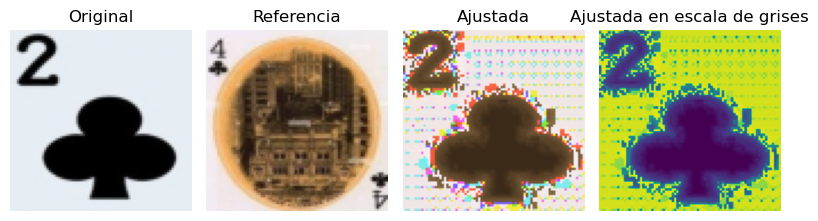

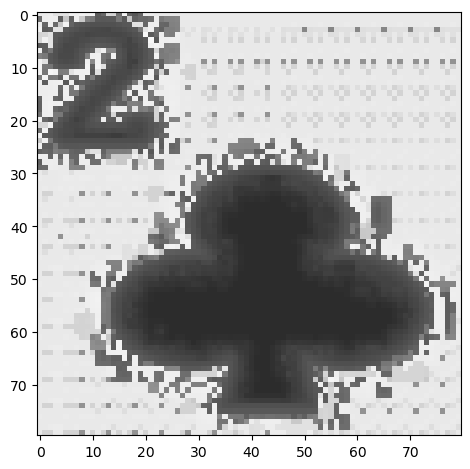

In [40]:
referencia = df_train[5]
imagen_de_prueba = df_train[1]

match = match_histograms (imagen_de_prueba, referencia, multichannel = True)
match_escala_de_grises = color.rgb2gray(match)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(imagen_de_prueba)
ax1.set_title('Original')
ax2.imshow(referencia)
ax2.set_title('Referencia')
ax3.imshow(match)
ax3.set_title('Ajustada')
ax4.imshow(match_escala_de_grises)
ax4.set_title('Ajustada en escala de grises')

plt.tight_layout()
plt.show()

io.imshow(match_escala_de_grises)

Para terminar con el preprocesamiento vamos a convertir las franjas del centro de la imagen a color 
negro, ya que aportan muy poca información

C:\Users\sergi\AppData\Local\Temp\ipykernel_25100\344796484.py:3: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  match_escala_de_grises = match_histograms(df_train[img], referencia, multichannel= True)


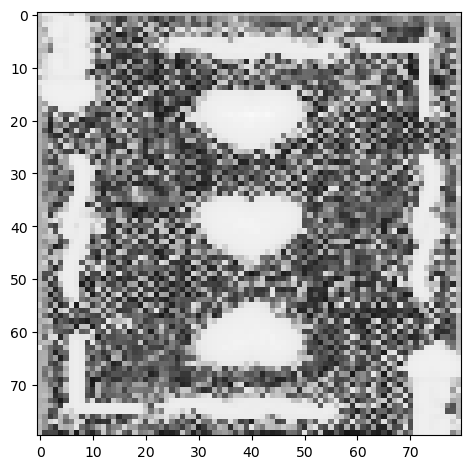

In [41]:
aux = []
for img in range(len(df_train)):
  match_escala_de_grises = match_histograms(df_train[img], referencia, multichannel= True)
  aux.append(color.rgb2gray(match_escala_de_grises))

df_train = np.array(aux)
io.imshow(df_train[0])

c:\Users\sergi\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


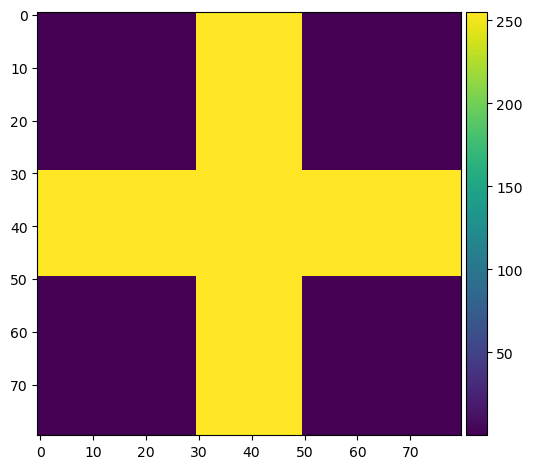

In [42]:
for imagen in df_train:
  for x in range(20):
    imagen[x+30]=255
    filas = np.arange(len(imagen))
  for x in filas:
    for y in range(20):
      imagen[x, y+30]=255

io.imshow(df_train[0])

Habiendo termiando ya el preprocesamiento procedemos a probar modelos de clusterización.

Primero debemos pasar el formato de las imagenes a un array unidimensional

In [43]:
aux = []
for img in range(len(df_train)):
  aux.append(df_train[img].ravel())

df_train = np.array(aux)

# Preprocesamiento del conjunto de datos de test

In [55]:
ruta_test = "./ML_Practica3/test"

aux = []
for img in os.listdir(ruta_test):
  img_normal = io.imread(os.path.join(ruta_test, img))
  img_resize = transform.resize(img_normal, output_shape=(img_size, img_size))
  aux.append(img_resize)

df_test = np.array(aux)

In [ ]:
aux = []
for img in range(len(df_test)):
  match_escala_de_grises = match_histograms(df_test[img], referencia, multichannel= True)
  aux.append(color.rgb2gray(match_escala_de_grises))

df_test = np.array(aux)

In [ ]:
for imagen in df_test:
  for x in range(20):
    imagen[x+30]=255
    filas = np.arange(len(imagen))
  for x in filas:
    for y in range(20):
      imagen[x, y+30]=255

Luego, debemos separar el conjunto de entrenamiento en entrenamiento y validacion

In [49]:
X_test = df_train[:100]
X_train = df_train[100:]

100
7789


Los dividimos de esta manera porque ahora vamos a etiquetar las 100 primeras imagenes a mano
con el único proposito de comprobar el ARI. Para ello usaremos las siguientes etiquetas:

cluster 0: corazones.
cluster 1: picas.
cluster 2: diamantes.
cluster 3: treboles.
cluster 4: jockers.

In [50]:
etiquetas = []
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("0")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("0")
etiquetas.append("0")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("0")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("0")
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("0")
etiquetas.append("2")
etiquetas.append("0")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("3")
etiquetas.append("3")
etiquetas.append("0")
etiquetas.append("1")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("4")
etiquetas.append("3")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("2")
etiquetas.append("1")
etiquetas.append("3")
etiquetas.append("1")
etiquetas.append("3")

print(len(etiquetas))

100


In [52]:
for i, iters in enumerate([100, 200, 300]):
  kmeans = KMeans(n_clusters= 5, max_iter= iters, random_state= 0)
  kmeans.fit(X_train)
  
  print("Kmeans iter:" + str(i + 1))
  print(adjusted_rand_score(etiquetas, kmeans.predict(X_test)))

Kmeans iter:1
-0.005555443499007339
Kmeans iter:2
-0.005555443499007339
Kmeans iter:3
-0.005555443499007339


In [11]:
"""for x in ["ward", "complete", "average", "single"]:
  agglomerative = AgglomerativeClustering(n_clusters = 5, linkage = x)
  print("Linkage: " + str(x))
  print(silhouette_score(df_train, agglomerative.fit_predict(df_train)))"""

'for x in ["ward", "complete", "average", "single"]:\n  agglomerative = AgglomerativeClustering(n_clusters = 5, linkage = x)\n  print("Linkage: " + str(x))\n  print(silhouette_score(df_train, agglomerative.fit_predict(df_train)))'

In [12]:
"""for x in ["nearest_neighbors"]:
  spectral = SpectralClustering(n_clusters= 5, affinity= x)
  print("Affinity: " + str(x))
  print(silhouette_score(df_train, spectral.fit_predict(df_train)))"""

'for x in ["nearest_neighbors"]:\n  spectral = SpectralClustering(n_clusters= 5, affinity= x)\n  print("Affinity: " + str(x))\n  print(silhouette_score(df_train, spectral.fit_predict(df_train)))'

Intentamos usar también rbf, pero el tiempo de computo era demasiado elevado para hacer pruebas
sobre él

De los metodos de clustering anteriores el que mejor resultado nos ha dado es kmeans así que
continuamos con él, por eso ahora vamos a ajustar sus hiperparametros.

In [30]:
parameters = {
  'init': ('k-means++', 'random'),
  'n_init': [5,7,10,12],
  'max_iter': [100,200,300,400],
  'algorithm': ('lloyd', 'elkan', 'auto', 'full')
}
kmeans = KMeans(n_clusters= 5, random_state= 0)
gridsearch = RandomizedSearchCV(kmeans, parameters, verbose=1, n_jobs=-1, cv=3)
gridsearch.fit(X_train)
print(gridsearch.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\sergi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KMeans(n_clusters=5, random_state=0),
                   n_jobs=-1,
                   param_distributions={'algorithm': ('lloyd', 'elkan', 'auto',
                                                      'full'),
                                        'init': ('k-means++', 'random'),
                                        'max_iter': [100, 200, 300, 400],
                                        'n_init': [5, 7, 10, 12]},
                   verbose=1)

In [54]:
kmeans = KMeans(n_clusters= 5, n_init= 7, max_iter= 100, init= 'random', algorithm= 'lloyd', random_state= 0)
kmeans.fit(X_train)
print(adjusted_rand_score(etiquetas, kmeans.predict(X_test)))

-0.005939191177623144


Aplanamos el conjunto de datos. Primero evaluamos el número de componentes con PCA y luego aplicamos ISOMAP.

Text(0, 0.5, 'Varianza explicada')

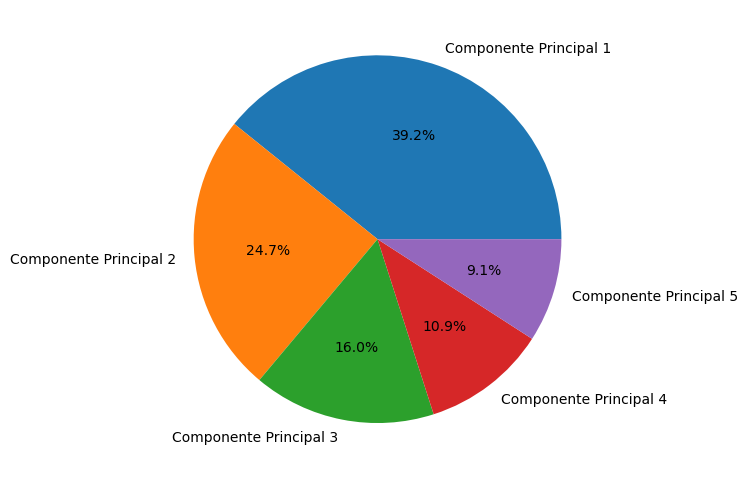

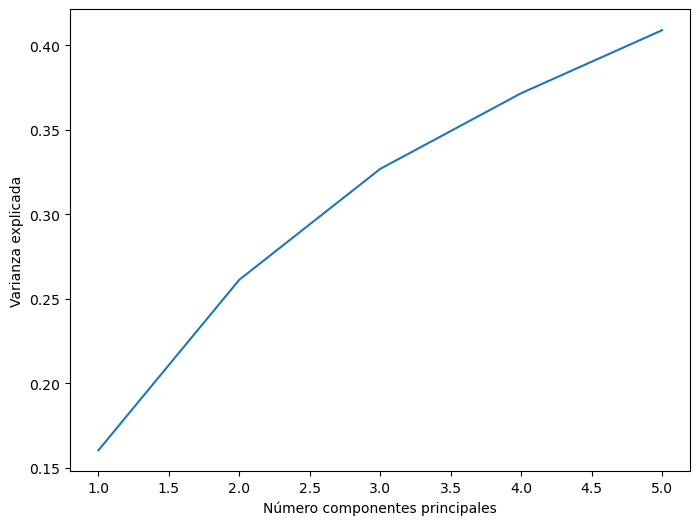

In [16]:
fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
pca = PCA(n_components=5, random_state=0).fit(X_train)
axs.pie(pca.explained_variance_ratio_, labels=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3', 'Componente Principal 4', 'Componente Principal 5'], autopct='%1.1f%%')

plt.figure(figsize=(8,6))
xx=np.arange(1,6, step=1)
yy=np.cumsum(pca.explained_variance_ratio_)

plt.plot(xx,yy)
plt.xlabel('Número componentes principales')
plt.ylabel('Varianza explicada')


In [17]:
isomap = Isomap(n_neighbors=10, n_components=1) 
X_projected = isomap.fit_transform(X_train)
